In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"D:\all download\russian_alcohol_consumption.csv")

In [4]:
df.head()

,year,region,wine,beer,vodka,champagne,brandy
0,1998,Republic of Adygea,1.9,8.8,3.4,0.3,0.1
1,1998,Altai Krai,3.3,19.2,11.3,1.1,0.1
2,1998,Amur Oblast,2.1,21.2,17.3,0.7,0.4
3,1998,Arkhangelsk Oblast,4.3,10.6,11.7,0.4,0.3
4,1998,Astrakhan Oblast,2.9,18.0,9.5,0.8,0.2


In [5]:
df_sep=df[df["region"]=="Saint Petersburg"]

In [7]:
df_not_sep=df[df["region"]!="Saint Petersburg"]

In [12]:
df_average=df_not_sep.groupby("year").mean()

In [30]:
alcohol_list=["wine","beer","vodka","champagne","brandy"]

0 0
0 1
0 2
1 0
1 1


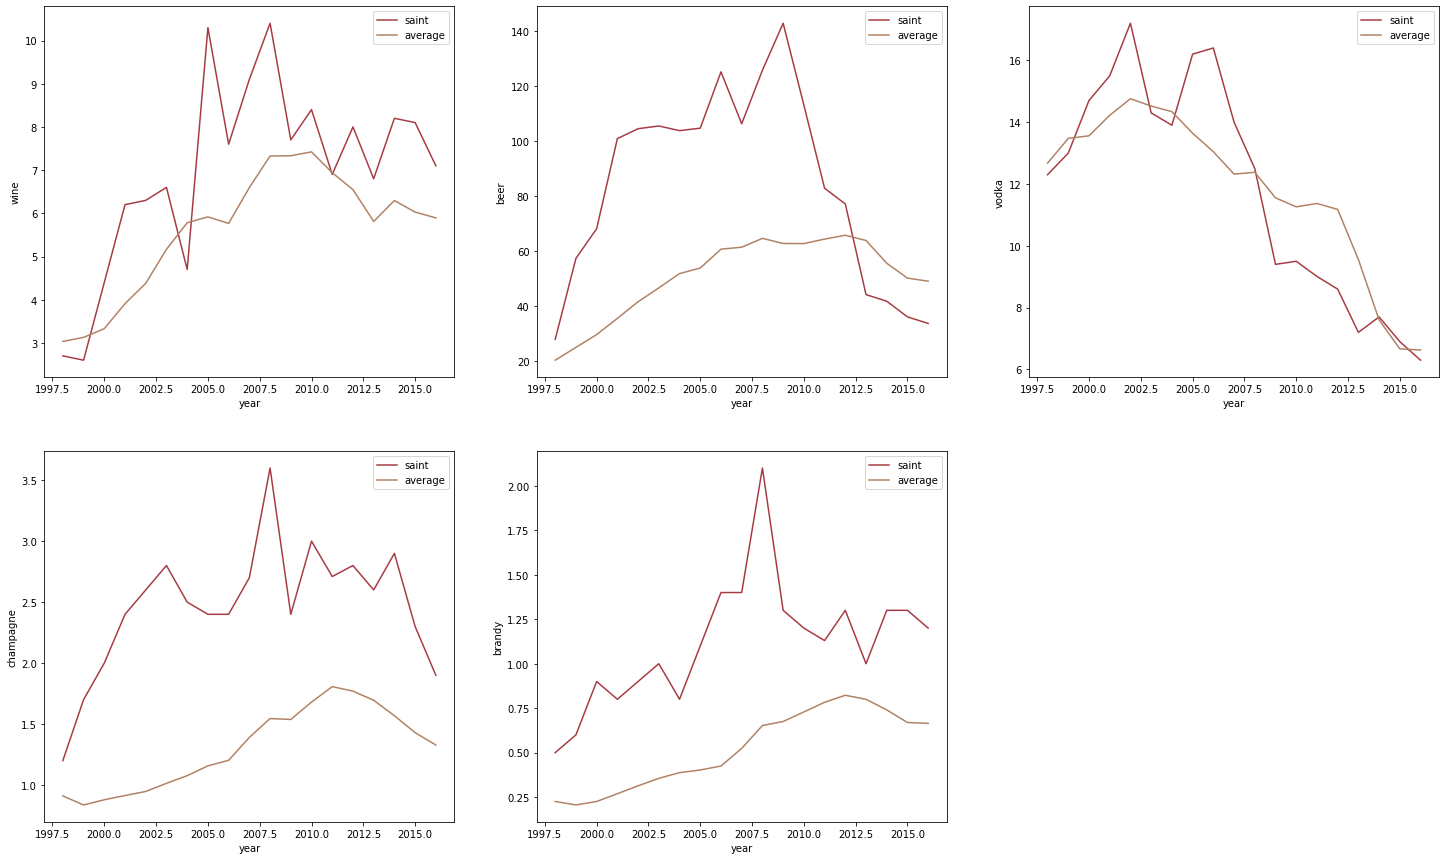

In [77]:
fig,axis=plt.subplots(2,3,figsize=(25,15))
axis[1,2].set_visible(False)
a,b,c=0,0,0
for li in alcohol_list:
    
    if ((a==0)& (b<3)):
        sns.lineplot(data=df_sep,x="year",y=li,ax=axis[a,b],label="saint",color="#A63B43")
        sns.lineplot(data=df_average,x="year",y=li,ax=axis[a,b],label="average",color="#B18164")
        b+=1
    else:
        a+=1
        if(a==1):
            sns.lineplot(data=df_sep,x="year",y=li,ax=axis[a,c],label="saint",color="#A63B43")
            sns.lineplot(data=df_average,x="year",y=li,ax=axis[a,c],label="average",color="#B18164")
            c+=1
            a-=1
        
    
    

In [176]:
df_year_5=df[df["year"]>=2012]
df_year_5=df_year_5[["year","region","wine"]]

In [352]:
df_year_5[df_year_5.isnull().any(axis=1)].groupby("region").count()

,year,wine
region,,


so we can see the Chechen Republic and Republic of ingushetia have no value in passed 5 year 

In [179]:
df_year_5=df_year_5[(df_year_5["region"]!="Chechen Republic")&(df_year_5["region"]!="Republic of Ingushetia")]
columns=["wine"]

In [180]:
for column in columns:
    df_year_5[column].fillna(df_year_5.groupby("region")[column].transform("mean"),inplace=True)
    df_year_5[column]=round(df_year_5[column],1)

F:\anaconda\anaconda1\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
<ipython-input-180-20ba26a19d91>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year_5[column]=round(df_year_5[column],1)


In [181]:
df_year_5

,year,region,wine
1190,2012,Republic of Adygea,3.1
1191,2012,Altai Krai,4.8
1192,2012,Amur Oblast,5.8
1193,2012,Arkhangelsk Oblast,9.2
1194,2012,Astrakhan Oblast,4.7
...,...,...,...
1610,2016,Chuvash Republic,5.0
1611,2016,Chukotka Autonomous Okrug,3.9
1612,2016,Sakha (Yakutia) Republic,4.3
1613,2016,Yamalo-Nenets Autonomous Okrug,4.5


In [182]:
df_year_5.shape

(415, 3)

In [386]:
df_year_5_wine=df_year_5.pivot_table(columns="year",index="region",fill_value=np.nan)

In [387]:
df_year_5_wine

wine                      
year                           2012 2013  2014 2015  2016
region                                                   
Altai Krai                      4.8  4.4   4.1  4.4   4.8
Altai Republic                  5.2  4.2   4.2  4.3   4.5
Amur Oblast                     5.8  6.7   6.1  6.0   6.2
Arkhangelsk Oblast              9.2  9.2  10.7  9.0   8.4
Astrakhan Oblast                4.7  4.2   5.1  4.7   4.5
...                             ...  ...   ...  ...   ...
Vologda Oblast                  9.8  8.2  10.0  8.5   8.6
Voronezh Oblast                 7.5  7.0   5.8  5.5   5.5
Yamalo-Nenets Autonomous Okrug  6.3  5.8   5.0  4.6   4.5
Yaroslavl Oblast                9.7  7.6   9.9  9.3  10.2
Zabaykalsky Krai                6.6  6.4   6.6  6.6   6.4

[83 rows x 5 columns]

In [191]:
mi=df_year_5_wine.columns

In [195]:
mi=mi.tolist()

In [208]:
ind=([str(e[0])+"_"+str(e[1])for e in mi])

In [206]:
for e in mi:
    print(str(e[0])+"_"+str(e[1]))

wine_2012
wine_2013
wine_2014
wine_2015
wine_2016


In [209]:
df_year_5_wine.columns=ind

In [217]:
df_year_5_wine_mean=df_year_5_wine[["wine_2012","wine_2013","wine_2014","wine_2015","wine_2016"]].mean(axis=1)

In [222]:
df_year_5_wine_max=df_year_5_wine[["wine_2012","wine_2013","wine_2014","wine_2015","wine_2016"]].max(axis=1)

In [223]:
df_year_5_wine_min=df_year_5_wine[["wine_2012","wine_2013","wine_2014","wine_2015","wine_2016"]].min(axis=1)

df_year_5_wine_per=(df_year_5_wine['wine_2016'] - df_year_5_wine['wine_2012'])/(df_year_5_wine['wine_2012'])*100

In [241]:
df_year_5_full=pd.concat((df_year_5_wine,df_year_5_wine_mean,df_year_5_wine_max,df_year_5_wine_min,df_year_5_wine_per),axis=1)

In [238]:
columns_name=["5yr_consumption_mean","5yr_consumption_max","5yr_consumption_min","5yr_consumption_change"]

In [239]:
index=ind+columns_name

In [243]:
df_year_5_full.columns=index


In [246]:
df_year_5_full.head()

,wine_2012,wine_2013,wine_2014,wine_2015,wine_2016,5yr_consumption_mean,5yr_consumption_max,5yr_consumption_min,5yr_consumption_change
region,,,,,,,,,
Altai Krai,4.8,4.4,4.1,4.4,4.8,4.50,4.8,4.1,0.000000
Altai Republic,5.2,4.2,4.2,4.3,4.5,4.48,5.2,4.2,-13.461538
Amur Oblast,5.8,6.7,6.1,6.0,6.2,6.16,6.7,5.8,6.896552
Arkhangelsk Oblast,9.2,9.2,10.7,9.0,8.4,9.30,10.7,8.4,-8.695652
Astrakhan Oblast,4.7,4.2,5.1,4.7,4.5,4.64,5.1,4.2,-4.255319


In [247]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [248]:
scaler=StandardScaler()

In [249]:
df_year_5_full_scaler=scaler.fit_transform(df_year_5_full)

In [253]:
df_year_5_full_scaler_pd=pd.DataFrame(df_year_5_full_scaler,index=df_year_5_full.index,columns=df_year_5_full.columns)

In [255]:
df_year_5_full_scaler_pd.head()

,wine_2012,wine_2013,wine_2014,wine_2015,wine_2016,5yr_consumption_mean,5yr_consumption_max,5yr_consumption_min,5yr_consumption_change
region,,,,,,,,,
Altai Krai,-0.762171,-0.670148,-0.880577,-0.703978,-0.480908,-0.730369,-0.888572,-0.643114,0.542063
Altai Republic,-0.584971,-0.766131,-0.840898,-0.746566,-0.610926,-0.739387,-0.726570,-0.593459,-0.131426
Amur Oblast,-0.319172,0.433659,-0.087006,-0.022577,0.125840,0.018145,-0.119062,0.201010,0.887101
Arkhangelsk Oblast,1.187022,1.633450,1.738207,1.255052,1.079303,1.434008,1.500960,1.492024,0.107014
Astrakhan Oblast,-0.806471,-0.766131,-0.483791,-0.576216,-0.610926,-0.667241,-0.767070,-0.593459,0.329167


In [257]:
ks=range(1,10)

In [260]:
inertia=[]


In [265]:
for k in ks:
    Kmean=KMeans(n_clusters=k).fit(df_year_5_full_scaler_pd)
    inertia.append(Kmean.inertia_)

F:\anaconda\anaconda1\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


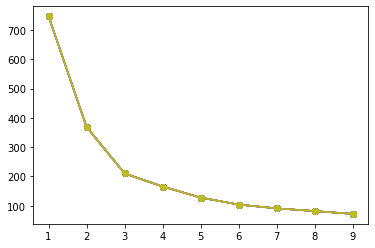

In [274]:
for k in ks:
    plt.plot(ks,inertia,"-o")
    plt.xticks(ks)

In [276]:
kmeans_cluster=KMeans(n_clusters=3,random_state=42).fit(df_year_5_full_scaler_pd)
cluster=kmeans_cluster.predict(df_year_5_full_scaler_pd)

In [277]:
df_year_5_full["cluster"]=cluster
df_year_5_full_scaler_pd["cluster"]=cluster

In [278]:
df_year_5_full_scaler_pd.head()

,wine_2012,wine_2013,wine_2014,wine_2015,wine_2016,5yr_consumption_mean,5yr_consumption_max,5yr_consumption_min,5yr_consumption_change,cluster
region,,,,,,,,,,
Altai Krai,-0.762171,-0.670148,-0.880577,-0.703978,-0.480908,-0.730369,-0.888572,-0.643114,0.542063,2
Altai Republic,-0.584971,-0.766131,-0.840898,-0.746566,-0.610926,-0.739387,-0.726570,-0.593459,-0.131426,2
Amur Oblast,-0.319172,0.433659,-0.087006,-0.022577,0.125840,0.018145,-0.119062,0.201010,0.887101,2
Arkhangelsk Oblast,1.187022,1.633450,1.738207,1.255052,1.079303,1.434008,1.500960,1.492024,0.107014,1
Astrakhan Oblast,-0.806471,-0.766131,-0.483791,-0.576216,-0.610926,-0.667241,-0.767070,-0.593459,0.329167,2


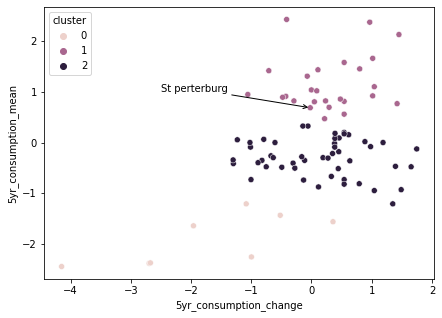

In [323]:
fig,axis=plt.subplots(figsize=(7,5))
avg_wine=df_year_5_full_scaler_pd.loc["Saint Petersburg","5yr_consumption_mean"]
change=df_year_5_full_scaler_pd.loc["Saint Petersburg","5yr_consumption_change"]
axis=sns.scatterplot(data=df_year_5_full_scaler_pd,x="5yr_consumption_change",y="5yr_consumption_mean",hue="cluster")
axis.annotate("St perterburg",xy=(change,avg_wine),xytext=(-2.5,1), arrowprops=dict(arrowstyle="->"))
plt.show()

In [347]:
cluster_agg=df_year_5_full_scaler_pd.groupby("cluster").agg({
    "5yr_consumption_mean":"mean",
    "5yr_consumption_change":"mean",
    "5yr_consumption_max":"mean",
    "5yr_consumption_min":"mean"
}).round(1).reset_index()

In [338]:
df_year_5_full_scaler_pd[df_year_5_full_scaler_pd["cluster"]==0].mean()[["5yr_consumption_mean"]]

5yr_consumption_mean   -1.911758
dtype: float64

In [388]:
avg_winee=df_year_5_full_scaler_pd.loc["Saint Petersburg","5yr_consumption_mean"]
avg_max=df_year_5_full_scaler_pd.loc["Saint Petersburg","5yr_consumption_max"]
avg_min=df_year_5_full_scaler_pd.loc["Saint Petersburg","5yr_consumption_min"]

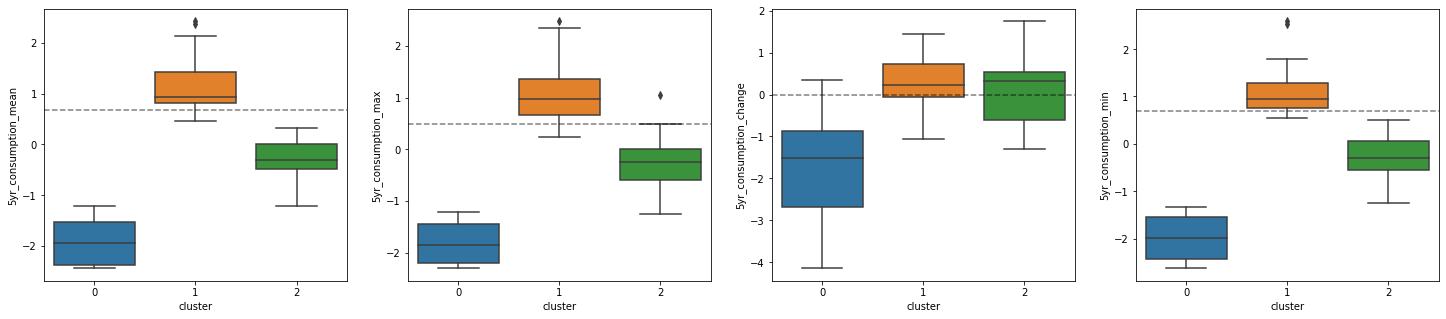

In [392]:
fig,axis=plt.subplots(1,4,figsize=(25,5),sharex=True)
sns.boxplot(data=df_year_5_full_scaler_pd,x="cluster",y="5yr_consumption_mean",ax=axis[0])
sns.boxplot(data=df_year_5_full_scaler_pd,x="cluster",y="5yr_consumption_max",ax=axis[1])
sns.boxplot(data=df_year_5_full_scaler_pd,x="cluster",y="5yr_consumption_change",ax=axis[2])
sns.boxplot(data=df_year_5_full_scaler_pd,x="cluster",y="5yr_consumption_min",ax=axis[3])
axis[3].axhline(y=avg_min,color="k",ls="--",alpha=0.5)
axis[0].axhline(y=avg_winee,color="k",ls="--",alpha=0.5)
axis[1].axhline(y=avg_max,color="k",ls="--",alpha=0.5)
axis[2].axhline(y=change,color="k",ls="--",alpha=0.5)


In [407]:
df_wine_cluster2=df_year_5_full_scaler_pd[df_year_5_full_scaler_pd["cluster"]==2]

In [408]:
list_cluster2_region=list(df_wine_cluster2.index.values)

In [409]:
df_selected_for_wine=df[(df["year"]>=2012)&(df["region"].isin(list_cluster2_region))]

In [415]:
df_selected_for_wine.head()

,year,region,wine,beer,vodka,champagne,brandy
1190,2012,Republic of Adygea,3.1,34.5,5.6,1.3,0.7
1191,2012,Altai Krai,4.8,70.4,11.0,1.5,0.4
1192,2012,Amur Oblast,5.8,75.8,13.3,1.9,0.6
1194,2012,Astrakhan Oblast,4.7,79.7,9.5,1.1,0.7
1198,2012,Republic of Buryatia,7.6,38.5,13.1,0.6,0.3


In [440]:
df_selected_for_wine_pivot=df_selected_for_wine.pivot_table(index="region",columns="year",fill_value=np.nan)
name_of_columns=df_selected_for_wine_pivot.columns.to_list()


In [442]:
indexx=pd.Index([str(e[0]) + "_" + str(e[1]) for e in name_of_columns])

In [443]:
df_selected_for_wine_pivot.columns=indexx

In [445]:
df_selected_for_wine_pivot.columns

Index(['beer_2012', 'beer_2013', 'beer_2014', 'beer_2015', 'beer_2016',
       'brandy_2012', 'brandy_2013', 'brandy_2014', 'brandy_2015',
       'brandy_2016', 'champagne_2012', 'champagne_2013', 'champagne_2014',
       'champagne_2015', 'champagne_2016', 'vodka_2012', 'vodka_2013',
       'vodka_2014', 'vodka_2015', 'vodka_2016', 'wine_2012', 'wine_2013',
       'wine_2014', 'wine_2015', 'wine_2016'],
      dtype='object')

In [485]:
df_selected_for_wine_pivot["average_beee"]=round(df_selected_for_wine_pivot[["beer_2012","beer_2013","beer_2014","beer_2015","beer_2016"]].mean(axis=1),1)
df_selected_for_wine_pivot["average_brandy"]=round(df_selected_for_wine_pivot[["brandy_2012","brandy_2013","brandy_2014","brandy_2015","brandy_2016"]].mean(axis=1),1)
df_selected_for_wine_pivot["average_champagne"]=round(df_selected_for_wine_pivot[["champagne_2012","champagne_2013","champagne_2014","champagne_2015","champagne_2016"]].mean(axis=1),1)
df_selected_for_wine_pivot["average_wine"]=round(df_selected_for_wine_pivot[["wine_2012","wine_2013","wine_2014","wine_2015","wine_2016"]].mean(axis=1),1)


In [499]:
df_selected_for_wine_pivot["change_wine"]=round((df_selected_for_wine_pivot["wine_2016"]-df_selected_for_wine_pivot["wine_2012"])/(df_selected_for_wine_pivot["wine_2012"])*100,1)
df_selected_for_wine_pivot["change_brandy"]=round((df_selected_for_wine_pivot["brandy_2016"]-df_selected_for_wine_pivot["brandy_2012"])/(df_selected_for_wine_pivot["brandy_2012"])*100,1)
df_selected_for_wine_pivot["change_vodka"]=round((df_selected_for_wine_pivot["vodka_2016"]-df_selected_for_wine_pivot["vodka_2012"])/(df_selected_for_wine_pivot["vodka_2012"])*100,1)
df_selected_for_wine_pivot["change_champagne"]=round((df_selected_for_wine_pivot["champagne_2016"]-df_selected_for_wine_pivot["champagne_2012"])/(df_selected_for_wine_pivot["champagne_2012"])*100,1)
df_selected_for_wine_pivot["change_beer"]=round((df_selected_for_wine_pivot["beer_2016"]-df_selected_for_wine_pivot["beer_2012"])/(df_selected_for_wine_pivot["beer_2012"])*100,1)

In [501]:
df_selected_for_wine_pivot.shape

(49, 35)

In [508]:
corr=df_selected_for_wine_pivot.corr(method="pearson")
mask=np.triu(np.ones_like(corr,dtype=bool))

In [510]:
mask

array([[ True,  True,  True, ...,  True,  True,  True],
       [False,  True,  True, ...,  True,  True,  True],
       [False, False,  True, ...,  True,  True,  True],
       ...,
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ..., False,  True,  True],
       [False, False, False, ..., False, False,  True]])

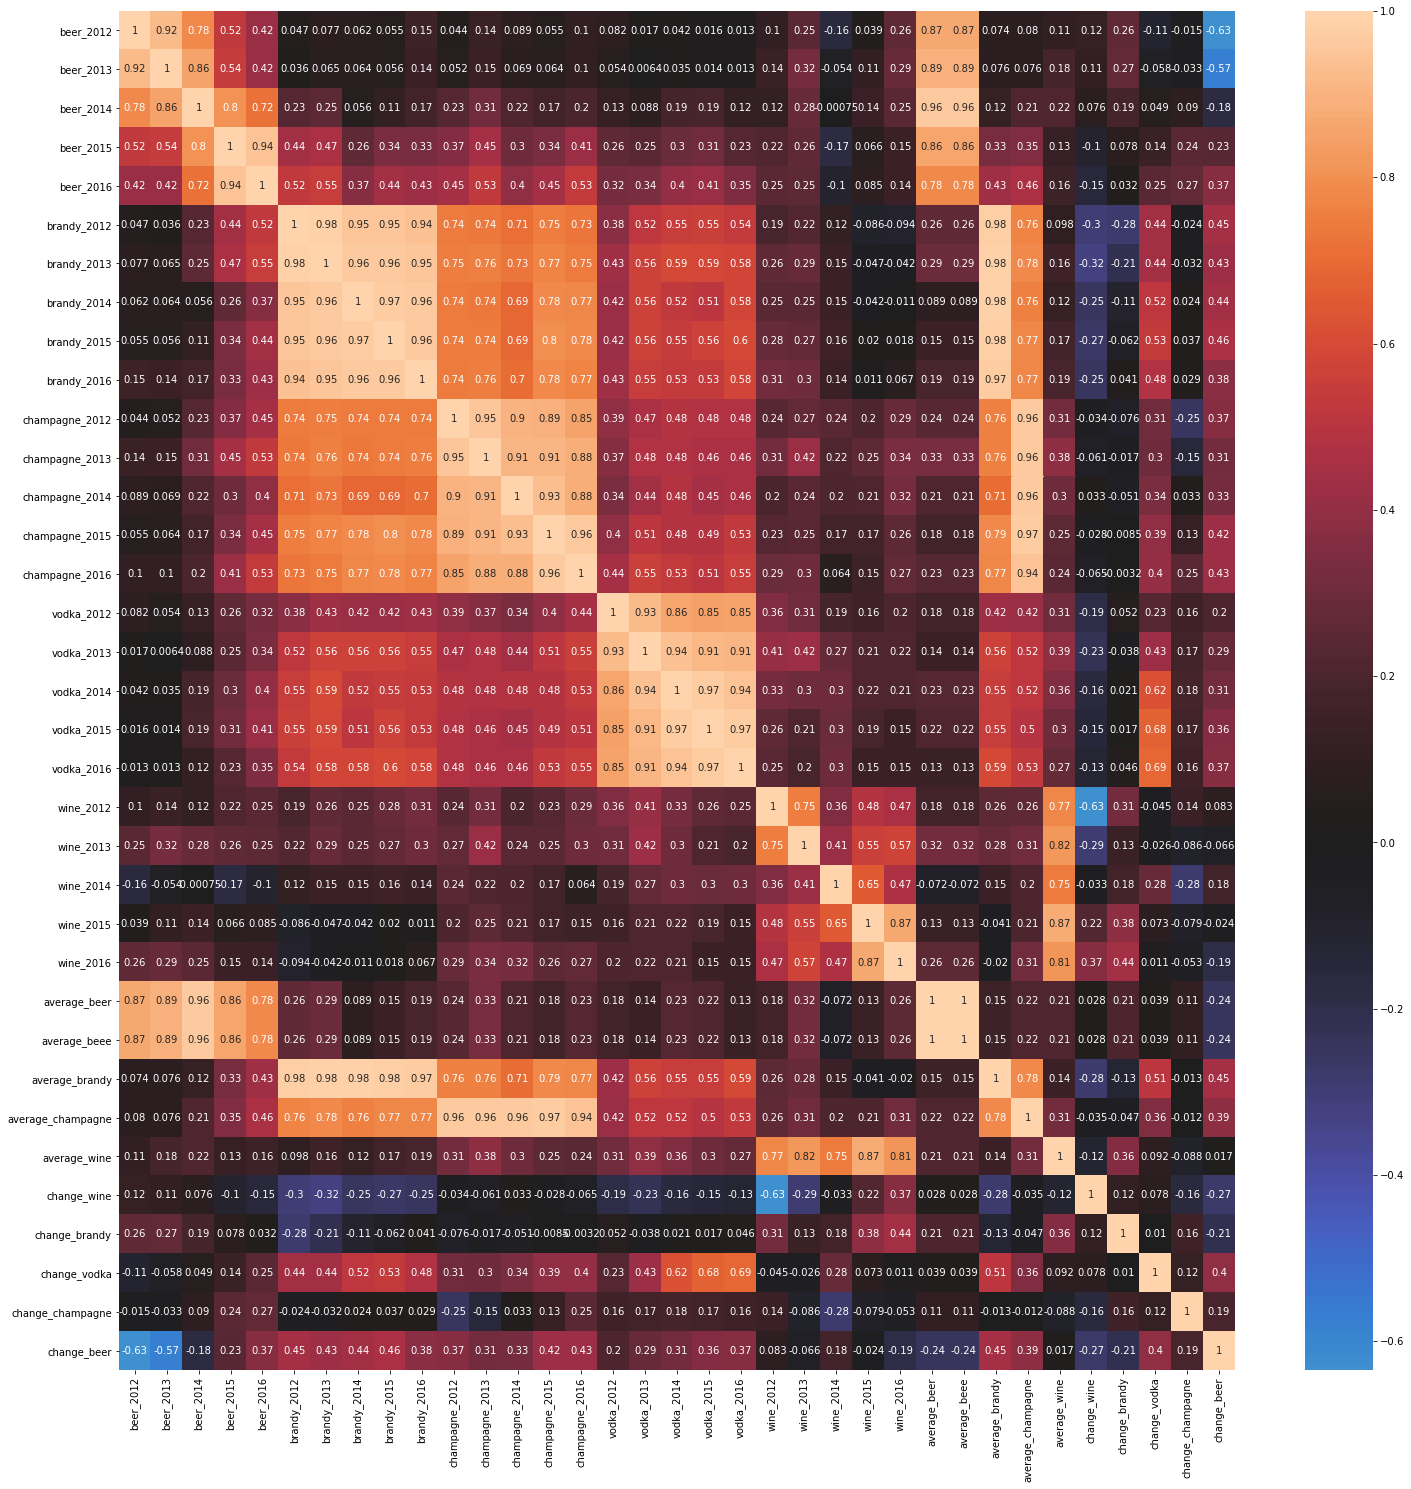

In [517]:
fig,axis=plt.subplots(figsize=(25,25))
axis=sns.heatmap(corr,center=0,annot=True)

In [528]:
region=list(df_selected_for_wine_pivot.index.values)
avg_wine_list=list(df_selected_for_wine_pivot["average_wine"])

In [529]:
wine_series=pd.Series(avg_wine_list,index=region)

In [532]:
wine_series.nsmallest(10)

Republic of Adygea       3.4
Republic of Crimea       4.0
Republic of Tatarstan    4.1
Republic of Khakassia    4.2
Orenburg Oblast          4.3
Rostov Oblast            4.3
Altai Krai               4.5
Altai Republic           4.5
Stavropol Krai           4.5
Astrakhan Oblast         4.6
dtype: float64

In [534]:
pwd

'C:\\Users\\User'